# Complete Classification Performance Evaluation Metrics

In [175]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split up in training and test set

In [176]:
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2,random_state=42)

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
clf = SGDClassifier(random_state=24, loss='log_loss', penalty='l2', alpha=0.001, max_iter=1000, tol=1e-3)

In [178]:
#Never ever fit on test data -> it essentially kills your purpose of train/test split.
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_Test)

# Accuracy Scores

In [179]:
print(accuracy_score(y_test, y_predicted))

0.895


In [180]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [181]:
print(precision_score(y_test, y_predicted))

0.8937437934458788


# Confusion Matrix to look after FP, TP etc

In [182]:
print(confusion_matrix(y_test, y_predicted))

[[890 107]
 [103 900]]


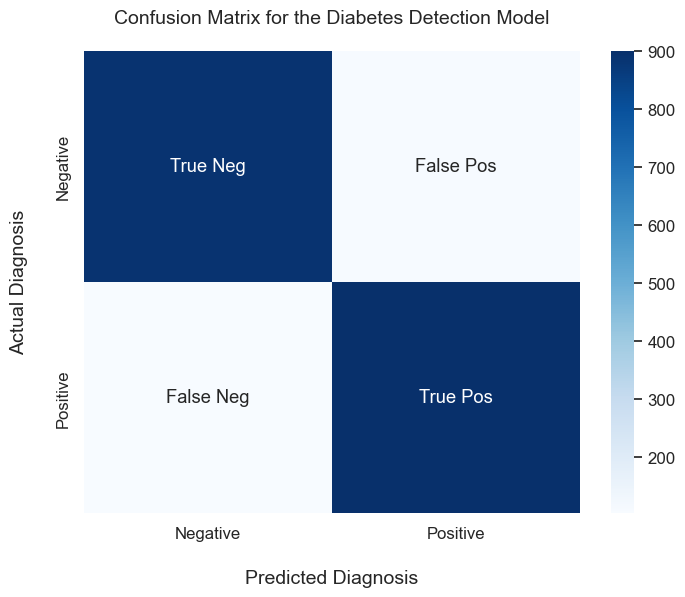

In [183]:
import numpy as np

cm = confusion_matrix(y_test, y_predicted)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)


# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

plt.show()

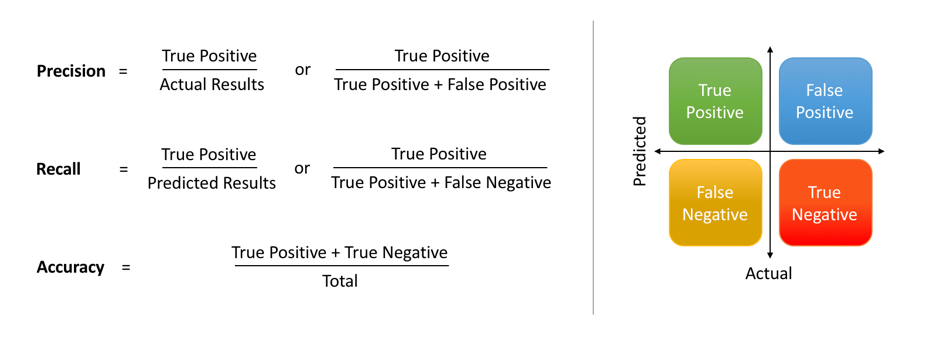

**The right cell represents the number of true positives (TP), which is 89. These are cases where the model correctly predicted the positive class.**

**The left cell represents the number of false negatives (FN), which is 22. These are cases where the model incorrectly predicted the negative class when the actual class was positive.**

**The top right left cell represents the number of false positives (FP), which is 13. These are cases where the model incorrectly predicted the positive class when the actual class was negative.** 

**The top left cell represents the number of true negatives (TN), which is 76. These are cases where the model correctly predicted the negative class**

# Precision talks about how precise/accurate our model is out of those predicted positive, how many of them are actual positive

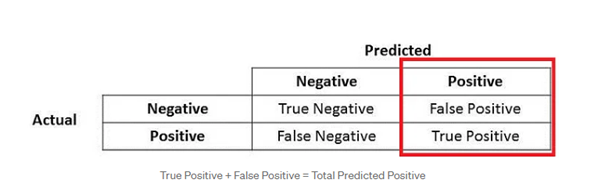

In [184]:
precision = precision_score(y_test, y_predicted)
print(precision)

0.8937437934458788


In [185]:
precision_recall_curve(y_test,y_predicted)

(array([0.5015    , 0.89374379, 1.        ]),
 array([1.        , 0.89730808, 0.        ]),
 array([0, 1]))

# Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).

Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

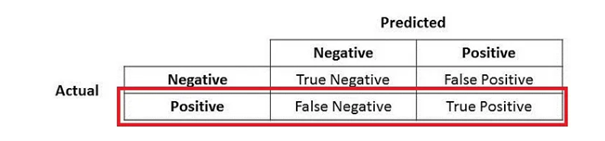

In [186]:
recall = recall_score(y_test,y_predicted)
print("Recall: " , recall)

Recall:  0.8973080757726819


# F1 Score
F1 might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [187]:
f1score = f1_score(y_test, y_predicted)
print("F1 Score: " , f1score)

F1 Score:  0.8955223880597015


# Precision Recall Curve

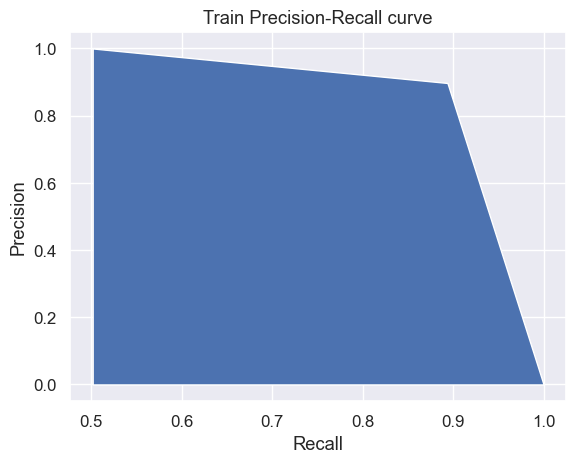

In [188]:
fpr1, tpr1, thresholds1 = precision_recall_curve(y_test, y_predicted)
plt.fill_between(fpr1, tpr1)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

# ROC Curve

In [189]:
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
# Calculating the false positive rate, true positive rate, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
auc = roc_auc_score(y_test, y_predicted)

In [190]:
#Creating the ROC Curve
roc_trace = go.Scatter(x=fpr, y=tpr, name="roc curve", mode="lines", line=dict(color="green"))
#Creating the Diagonal Line
diag_trace=go.Scatter(
    x=[0,1], y=[0,1], name="Diagonal", mode="lines", line=dict(color="gray", dash="dash")
)

#Creating the layout
layout = go.Layout(title="AUC & ROC Curve", xaxis=dict(title="False Positive Rate"), yaxis=dict(title="True Positive Rate"))

#Creating the figure
fig = go.Figure(data=[roc_trace, diag_trace], layout=layout)

#Adding the AUC Score to the figure
fig.add_annotation(x=0.5,y=0.1,text=f" AUC = {auc: 0.4f}", showarrow=False, font=dict(size=16))

fig.show()

In [191]:
print(accuracy_score(y_test, y_predicted))

0.895


In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       997
           1       0.89      0.90      0.90      1003

    accuracy                           0.90      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.90      0.89      2000

